In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
import praw
import pandas as pd

# Initialize Reddit API
reddit = praw.Reddit(
    client_id="FUYVVHDwiS4o6nR4xHfngQ",
    client_secret="TY3FNnrfTGvpdFIZ_pYlOGuY4URilQ",
    user_agent="Stock Scraper"
)

# Scraping subreddit data
def scrape_reddit(subreddit_name, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    data = []
    for post in subreddit.new(limit=limit):
        data.append({
            "title": post.title,
            "selftext": post.selftext,
            "created_utc": post.created_utc,
            "score": post.score,
            "num_comments": post.num_comments
        })
    return pd.DataFrame(data)

# Example: Scrape r/stocks
df_raw = scrape_reddit("stocks", limit=5000)
df_raw.to_csv("reddit_stocks.csv", index=False)
print("Scraping Complete. Data saved as 'reddit_stocks.csv'.")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Scraping Complete. Data saved as 'reddit_stocks.csv'.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download

# NLTK Resources
download('punkt')
download('stopwords')
download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs and non-alphabetic characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
df_raw['cleaned_text'] = df_raw['title'] + " " + df_raw['selftext']
df_raw['cleaned_text'] = df_raw['cleaned_text'].apply(clean_text)
df_clean = df_raw[['cleaned_text', 'score', 'num_comments']]
df_clean.to_csv("cleaned_reddit_stocks.csv", index=False)
print("Preprocessing Complete. Data saved as 'cleaned_reddit_stocks.csv'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Preprocessing Complete. Data saved as 'cleaned_reddit_stocks.csv'.


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# VADER Initialization
download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Add sentiment scores
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Overall sentiment score

df_clean['sentiment'] = df_clean['cleaned_text'].apply(analyze_sentiment)
df_clean.to_csv("sentiment_reddit_stocks.csv", index=False)
print("Sentiment Analysis Complete. Data saved as 'sentiment_reddit_stocks.csv'.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Analysis Complete. Data saved as 'sentiment_reddit_stocks.csv'.


<ipython-input-4-195bb99e1805>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment'] = df_clean['cleaned_text'].apply(analyze_sentiment)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Label creation: Positive if sentiment > 0.1, Negative otherwise
df_clean['label'] = np.where(df_clean['sentiment'] > 0.1, 1, 0)

# Feature and label split
X = df_clean[['score', 'num_comments', 'sentiment']]
y = df_clean['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       143

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



<ipython-input-5-70410bd7a02b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['label'] = np.where(df_clean['sentiment'] > 0.1, 1, 0)


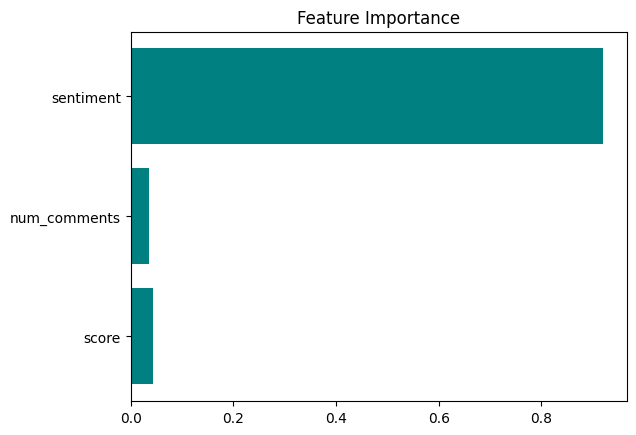

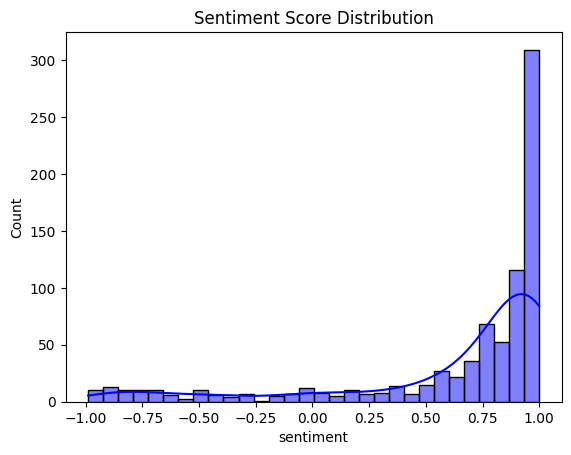

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
importance = model.feature_importances_
features = X.columns
plt.barh(features, importance, color='teal')
plt.title('Feature Importance')
plt.show()

# Sentiment Distribution
sns.histplot(df_clean['sentiment'], kde=True, bins=30, color='blue')
plt.title('Sentiment Score Distribution')
plt.show()
